In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Общие параметры
M = 1000  # Количество выборок
n = 30    # Размер одной выборки
a = 5     # Математическое ожидание нормального распределения
sigma2 = 4  # Истинная дисперсия
sigma = np.sqrt(sigma2)  # Стандартное отклонение
gamma = 0.95  # Надежность (уровень доверия)
alpha = 1 - gamma  # Уровень значимости
K = 500  # Количество повторений моделирования для вычисления массива гамма*

In [3]:
# Функция для нахождения доверительного интервала дисперсии
def confidence_interval_variance(sample, alpha):
    n = len(sample)
    s2 = np.var(sample, ddof=1)  # Выборочная несмещенная дисперсия
    chi2_left = stats.chi2.ppf(alpha / 2, df=n - 1)
    chi2_right = stats.chi2.ppf(1 - alpha / 2, df=n - 1)
    lower = (n - 1) * s2 / chi2_right
    upper = (n - 1) * s2 / chi2_left
    return lower, upper

In [4]:
# 1. Моделирование M выборок из нормального распределения и нахождение гамма*
gamma_star_list = []
for _ in range(M):
    sample = np.random.normal(loc=a, scale=sigma, size=n)
    lower, upper = confidence_interval_variance(sample, alpha)
    gamma_star_list.append(lower <= sigma2 <= upper)

gamma_star = np.mean(gamma_star_list)
print(f"Точечная оценка надежности гамма*: {gamma_star}")


Точечная оценка надежности гамма*: 0.942


In [5]:
# 2. Повторение моделирования K раз для оценки распределения гамма*
gamma_star_array = []
for _ in range(K):
    gamma_star_list = []
    for _ in range(M):
        sample = np.random.normal(loc=a, scale=sigma, size=n)
        lower, upper = confidence_interval_variance(sample, alpha)
        gamma_star_list.append(lower <= sigma2 <= upper)
    gamma_star_array.append(np.mean(gamma_star_list))


In [6]:
# Вычисление числовых характеристик
mean_gamma_star = np.mean(gamma_star_array)
var_gamma_star = np.var(gamma_star_array, ddof=1)
print(f"Среднее значение гамма*: {mean_gamma_star}")
print(f"Дисперсия гамма*: {var_gamma_star}")

Среднее значение гамма*: 0.949468
Дисперсия гамма*: 4.902703006012019e-05


Text(0, 0.5, 'Относительная частота')

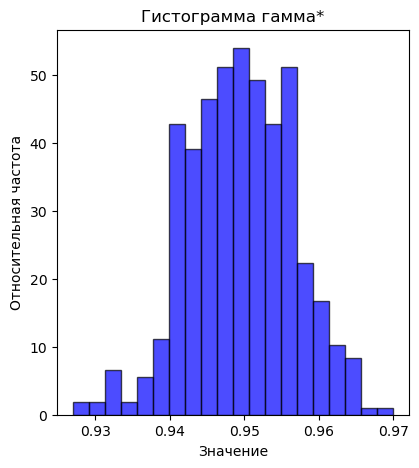

In [7]:
# Построение гистограммы и боксплота
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(gamma_star_array, bins=20, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title("Гистограмма гамма*")
plt.xlabel("Значение")
plt.ylabel("Относительная частота")

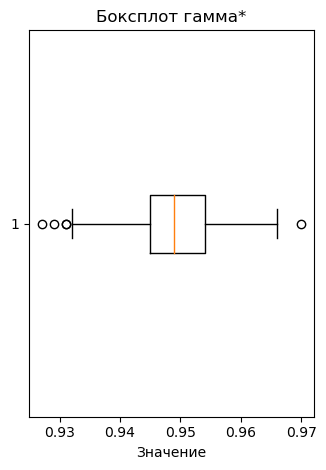

In [8]:
plt.subplot(1, 2, 2)
plt.boxplot(gamma_star_array, vert=False)
plt.title("Боксплот гамма*")
plt.xlabel("Значение")
plt.tight_layout()
plt.show()

In [9]:
# 3. Моделирование M выборок случайной величины W
def generate_w_samples(n):
    # Пример: W = X^2, где X ~ N(a, sigma2)
    x_sample = np.random.normal(loc=a, scale=sigma, size=n)
    return x_sample**2

In [10]:
gamma_star_w_list = []
for _ in range(M):
    sample_w = generate_w_samples(n)
    lower, upper = confidence_interval_variance(sample_w, alpha)
    gamma_star_w_list.append(lower <= np.var(sample_w) <= upper)

In [11]:
gamma_star_w = np.mean(gamma_star_w_list)
print(f"Точечная оценка надежности гамма* для W: {gamma_star_w}")

Точечная оценка надежности гамма* для W: 1.0


In [12]:
# 4. Повторение моделирования K раз для оценки гамма* для W
gamma_star_w_array = []
for _ in range(K):
    gamma_star_w_list = []
    for _ in range(M):
        sample_w = generate_w_samples(n)
        lower, upper = confidence_interval_variance(sample_w, alpha)
        gamma_star_w_list.append(lower <= np.var(sample_w) <= upper)
    gamma_star_w_array.append(np.mean(gamma_star_w_list))

In [13]:
# Вычисление числовых характеристик для W
mean_gamma_star_w = np.mean(gamma_star_w_array)
var_gamma_star_w = np.var(gamma_star_w_array, ddof=1)
print(f"Среднее значение гамма* для W: {mean_gamma_star_w}")
print(f"Дисперсия гамма* для W: {var_gamma_star_w}")

Среднее значение гамма* для W: 1.0
Дисперсия гамма* для W: 0.0


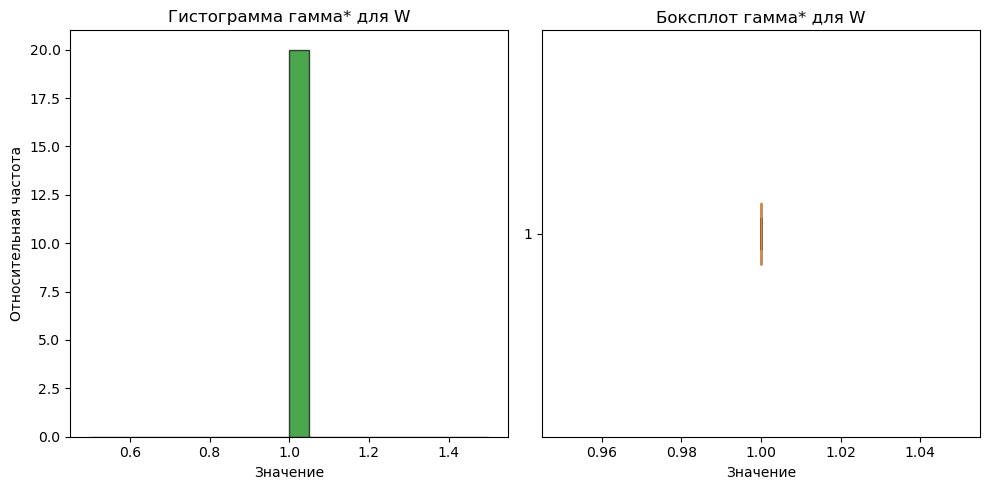

In [14]:
# Построение гистограммы и боксплота для W
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(gamma_star_w_array, bins=20, density=True, alpha=0.7, color='green', edgecolor='black')
plt.title("Гистограмма гамма* для W")
plt.xlabel("Значение")
plt.ylabel("Относительная частота")

plt.subplot(1, 2, 2)
plt.boxplot(gamma_star_w_array, vert=False)
plt.title("Боксплот гамма* для W")
plt.xlabel("Значение")
plt.tight_layout()
plt.show()
